In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
import FittingWorkCleaner as FWC
import Neutrino_Work as NW
from classy import Class

In [2]:
data= np.load("mass-300-life-0.030.npz", allow_pickle=True)
f_actual = data['fe'][-1]
e_actual = data['e'][-1]

data_2= np.load("mass-300-life-0.584.npz", allow_pickle=True)
f_actual_2 = data_2['fe'][-1]
e_actual_2 = data_2['e'][-1]


data_file = np.load("test-fit.npz", allow_pickle=True)
e = data_file['eps']
f = data_file['fe']


data_file2 = np.load("test-fit2.npz", allow_pickle=True)
e2 = data_file2['eps']
f2 = data_file2['fe']

In [3]:
print(data.files)

['mass', 'mixing', 'lifetime', 'neff', 'scalefactors', 'time', 'temp', 'Tcm', 'e', 'fe', 'NumbDensityDist', 'decayrate', 'collisionrate', 'n_p_rate', 'p_n_rate']


In [4]:
LambdaCDM_settings = {'omega_b':0.0223828,
                     #'omega_cdm':0.1201075,
                     'h':0.67810,
                     'A_s':2.100549e-09,
                     'n_s':0.9660499,
                     'tau_reio':0.05430842,
                     'output':'mPk',
                     'P_k_max_1/Mpc':3.0,
                      'Omega_m':0.309883043,
                     # The next line should be uncommented for higher precision (but significantly slower running)
                     'ncdm_fluid_approximation':3,
                     # You may uncomment this line to get more info on the ncdm sector from Class:
                     'background_verbose':1
                    }



LambdaCDM = Class()
LambdaCDM.set(LambdaCDM_settings)
LambdaCDM.compute()



kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk_LambdaCDM = np.zeros(len(kk)) # P(k) in (Mpc/h)**3
h = LambdaCDM_settings['h'] # get reduced Hubble for conversions to 1/Mpc

for i,k in enumerate(kk):
    Pk_LambdaCDM[i] = LambdaCDM.pk(k*h,0.)*h**3 # function .pk(k,z)
    

In [5]:
def v_masses_nontherm(m_small, normal,e_array,f_array,poly_degree,plot):
    
    #if normal is True, uses the normal hiearachy, If normal False, uses the inverted hiearachy.
    #if plot is true, neutrino spectra is plotted. If false, spectra is not plotted. parameters returned in both 
    
    mass1,mass2,mass3 = NW.v_masses(m_small,normal)
    
    T_best,N_best,coefficients = FWC.finale(e_array,f_array,poly_degree,plot)
    
    params = '{},{},{},{},{},{},{}'.format(T_best,N_best,coefficients[0],coefficients[1],coefficients[2],coefficients[3],coefficients[4])
    
    af = data['scalefactors'][-1]
    tf = data['temp'][-1]
    value = 1/(af*tf)

    
    neutrino_mass_settings = {'N_ncdm':3,
          'use_ncdm_psd_files': "0,0,0",
          'm_ncdm': '{},{},{}'.format(mass1,mass2,mass3),
          'T_ncdm':'{},{},{}'.format(value,value,value),
          'ncdm_psd_parameters': params,  
          'N_ur':0.00441                  
        }              
    
    
    neutrino = Class()
    neutrino.set(LambdaCDM_settings)
    neutrino.set(neutrino_mass_settings)
    neutrino.compute()

    kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
    Pk_neutrino = np.zeros(len(kk))

    for i,k in enumerate(kk):
        Pk_neutrino[i] = neutrino.pk(k*h,0.)*h**3 # function .pk(k,z)


    plt.figure()
    plt.loglog(kk,Pk_LambdaCDM)
    plt.loglog(kk,Pk_neutrino,linestyle='--')
    plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
    plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
    plt.show()


    plt.figure()
    plt.semilogx(kk,Pk_neutrino/Pk_LambdaCDM-1)
    plt.xlabel(r'$k [h /\mathrm{Mpc}]$')
    plt.ylabel(r'$P(k)^\nu/P(k)-1$')
    plt.show()
    
    
    dict_n = NW.dict_results(neutrino)
    return dict_n
    

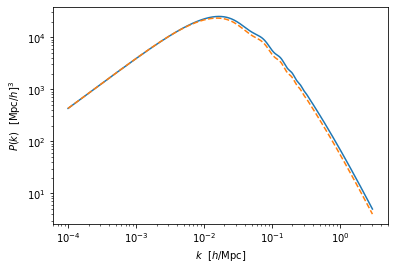

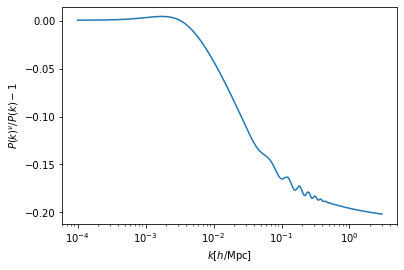

{'age': 13.772632808440553,
 'Neff': 3.01382608201756,
 'omega_b': 0.022382800000000005,
 'Omega0_cdm': 0.2540513424957565,
 'h': 0.6781,
 'Omega0_k': 0.0,
 'Omega0_m': 0.30988279617504083,
 'Omega_b': 0.04867734979810887,
 'Omega_g': 5.378150968509927e-05,
 'Omega_lambda': 0.6900631216258057,
 'Omega_m': 0.30988279617504083,
 'Omega_r': 5.408219915338903e-05,
 'rs_drag': 148.04074990457744,
 'Sigma8': 0.7517134562023742,
 'Sigma8_cb': 0.7671558737575425,
 'T_cmb': 2.7255,
 'theta_s_100': 1.0475737838735104,
 'theta_star_100': 1.0499689446849125,
 'n_s': 0.9660499,
 'tau_reio': 0.05430842}

In [6]:
v_masses_nontherm(0.1,True,e_actual,f_actual,4,False)

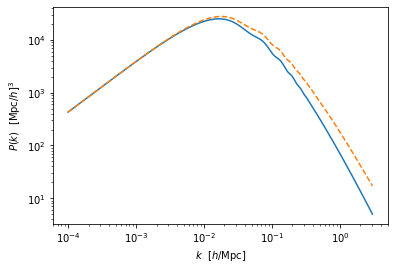

TypeError: argument of type 'NoneType' is not iterable

Exception ignored in: 'classy.Class.__dealloc__'
Traceback (most recent call last):
  File "classy.pyx", line 208, in classy.Class.struct_cleanup
TypeError: argument of type 'NoneType' is not iterable


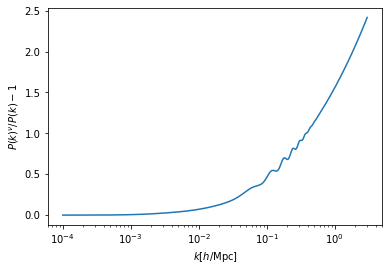

{'age': 13.772726593909251,
 'Neff': 2.031060136986998,
 'omega_b': 0.022382800000000005,
 'Omega0_cdm': 0.25563062542365217,
 'h': 0.6781,
 'Omega0_k': 0.0,
 'Omega0_m': 0.30988292799284606,
 'Omega_b': 0.04867734979810887,
 'Omega_g': 5.378150968509927e-05,
 'Omega_lambda': 0.6900631216258057,
 'Omega_m': 0.30988292799284606,
 'Omega_r': 5.395038134821142e-05,
 'rs_drag': 153.18852992513771,
 'Sigma8': 1.0568763932754006,
 'Sigma8_cb': 1.0740018213327898,
 'T_cmb': 2.7255,
 'theta_s_100': 1.0840272193113092,
 'theta_star_100': 1.086518829252064,
 'n_s': 0.9660499,
 'tau_reio': 0.05430842}

In [7]:
v_masses_nontherm(0.1,True,e_actual_2,f_actual_2,4,False)

In [8]:
def important_graphs(filename,normal,plot):
    
    #if normal is True, uses the normal hiearachy, If normal False, uses the inverted hiearachy.
    #if plot is true, neutrino spectra is plotted. If false, spectra is not plotted.
    
    data_file = np.load(filename, allow_pickle=True)
    e_data = data_file['e'][-1]
    f_data = data_file['fe'][-1]
    m_small = 0.1
    poly_degree = 4 
    
    #m_small is 0.1, but could also be 0.01
    
    neutrino_results = v_masses_nontherm(m_small,normal,e_data,f_data,poly_degree,plot)
    return neutrino_results
 

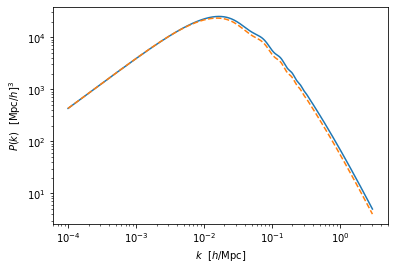

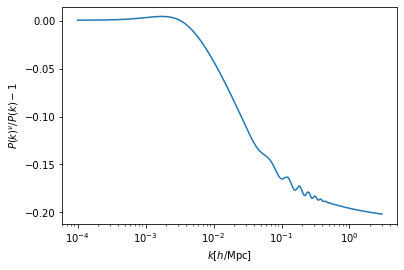

{'age': 13.772632808440553,
 'Neff': 3.01382608201756,
 'omega_b': 0.022382800000000005,
 'Omega0_cdm': 0.2540513424957565,
 'h': 0.6781,
 'Omega0_k': 0.0,
 'Omega0_m': 0.30988279617504083,
 'Omega_b': 0.04867734979810887,
 'Omega_g': 5.378150968509927e-05,
 'Omega_lambda': 0.6900631216258057,
 'Omega_m': 0.30988279617504083,
 'Omega_r': 5.408219915338903e-05,
 'rs_drag': 148.04074990457744,
 'Sigma8': 0.7517134562023742,
 'Sigma8_cb': 0.7671558737575425,
 'T_cmb': 2.7255,
 'theta_s_100': 1.0475737838735104,
 'theta_star_100': 1.0499689446849125,
 'n_s': 0.9660499,
 'tau_reio': 0.05430842}

In [9]:
important_graphs("mass-300-life-0.030.npz",True,False)

TypeError: argument of type 'NoneType' is not iterable

Exception ignored in: 'classy.Class.__dealloc__'
Traceback (most recent call last):
  File "classy.pyx", line 208, in classy.Class.struct_cleanup
TypeError: argument of type 'NoneType' is not iterable


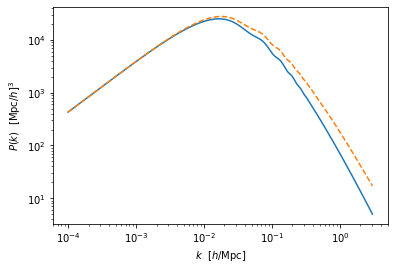

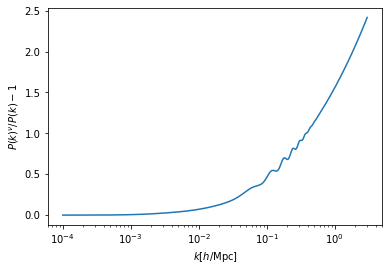

{'age': 13.772726593909251,
 'Neff': 2.031060136986998,
 'omega_b': 0.022382800000000005,
 'Omega0_cdm': 0.25563062542365217,
 'h': 0.6781,
 'Omega0_k': 0.0,
 'Omega0_m': 0.30988292799284606,
 'Omega_b': 0.04867734979810887,
 'Omega_g': 5.378150968509927e-05,
 'Omega_lambda': 0.6900631216258057,
 'Omega_m': 0.30988292799284606,
 'Omega_r': 5.395038134821142e-05,
 'rs_drag': 153.18852992513771,
 'Sigma8': 1.0568763932754006,
 'Sigma8_cb': 1.0740018213327898,
 'T_cmb': 2.7255,
 'theta_s_100': 1.0840272193113092,
 'theta_star_100': 1.086518829252064,
 'n_s': 0.9660499,
 'tau_reio': 0.05430842}

In [10]:
important_graphs("mass-300-life-0.584.npz",True,False)